In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Summer

## **Importing Data from 2018-2020**

In [2]:
river_2018 = pd.read_csv("RiverFlow2021Summer.csv")

In [3]:
river_2018

,Timestamp,BlairCreek,Bridgeport,BridgeportWQ,Doon,Drayton,Elmira,Erbsville,Keldon,Leggatt,MillCreek,Moorefield,Phillipsburg,Road32,VictoriaRoad,Waldemar,WillowBrook,York
0,2021-04-01 00:00:00,0.216750,48.91250,48.176144,57.558396,7.026891,1.0696,0.189991,2.564448,8.441180,0.636200,2.163580,7.216250,9.773074,4.075544,17.947711,3.176000,133.40625
1,2021-04-01 01:00:00,0.219250,48.02500,47.037883,55.038039,6.965361,1.0634,0.185581,2.549632,8.421840,0.614242,2.133636,7.078437,9.728050,4.052794,17.792929,3.120000,130.90625
2,2021-04-01 02:00:00,0.220750,47.43750,46.406749,51.806894,6.814998,1.0634,0.185511,2.466664,8.267171,0.619800,2.106864,6.962500,9.709093,4.044184,17.547835,3.072000,128.95000
3,2021-04-01 03:00:00,0.219000,47.15000,45.899869,48.980689,6.808008,1.0572,0.179172,2.499256,8.141500,0.608000,2.079034,6.802812,9.683026,4.024742,17.238236,3.033500,127.78750
4,2021-04-01 04:00:00,0.216375,46.60000,45.674925,47.022421,6.719299,1.0448,0.179023,2.469632,7.967491,0.600000,2.043102,6.632187,9.602457,3.998342,17.083454,2.991500,126.66250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,2021-09-30 19:00:00,0.209000,47.46250,47.374500,43.776878,2.335034,0.5800,0.118755,1.026581,3.257249,0.583325,1.007014,2.273650,3.463374,1.164345,3.895469,0.370800,89.09375
4388,2021-09-30 20:00:00,0.207250,47.48750,47.247000,43.108846,2.294821,0.5800,0.118513,1.026183,3.228754,0.580046,0.993214,2.249250,3.448969,1.164400,3.866832,0.366975,88.00000
4389,2021-09-30 21:00:00,0.208750,47.41250,47.132250,42.593328,2.252932,0.5750,0.118465,1.026581,3.188803,0.578736,0.978067,2.218750,3.426807,1.164400,3.855359,0.363575,86.59375
4390,2021-09-30 22:00:00,0.206625,46.67500,46.469250,42.495321,2.214331,0.5750,0.118005,1.024390,3.131796,0.573631,0.963654,2.174525,3.402429,1.164237,3.821088,0.358475,85.28125


In [4]:
river_2018.set_index(["Timestamp"], inplace= True)

In [5]:
river_2018[river_2018 == np.nan].count()

BlairCreek      0
Bridgeport      0
BridgeportWQ    0
Doon            0
Drayton         0
Elmira          0
Erbsville       0
Keldon          0
Leggatt         0
MillCreek       0
Moorefield      0
Phillipsburg    0
Road32          0
VictoriaRoad    0
Waldemar        0
WillowBrook     0
York            0
dtype: int64

In [6]:
river_2018[river_2018 <= 0].count()

BlairCreek      0
Bridgeport      0
BridgeportWQ    0
Doon            0
Drayton         0
Elmira          0
Erbsville       0
Keldon          0
Leggatt         0
MillCreek       0
Moorefield      0
Phillipsburg    0
Road32          0
VictoriaRoad    0
Waldemar        0
WillowBrook     0
York            0
dtype: int64

## **Preprocessing of DataFrame**

We need only York, Doon and Bridgeport Stations data

Extracting only the three stations we which we need

In [7]:
river_2018 = river_2018[["York", "Doon", "Bridgeport"]]
river_2018

,York,Doon,Bridgeport
Timestamp,,,
2021-04-01 00:00:00,133.40625,57.558396,48.91250
2021-04-01 01:00:00,130.90625,55.038039,48.02500
2021-04-01 02:00:00,128.95000,51.806894,47.43750
2021-04-01 03:00:00,127.78750,48.980689,47.15000
2021-04-01 04:00:00,126.66250,47.022421,46.60000
...,...,...,...
2021-09-30 19:00:00,89.09375,43.776878,47.46250
2021-09-30 20:00:00,88.00000,43.108846,47.48750
2021-09-30 21:00:00,86.59375,42.593328,47.41250


In [8]:
len(river_2018)

4392

Here, I will divide the dataframe into training and testing by 70-30 split in chronological order. So training would contain - 3075 and testing would contain the rest.

In [9]:
train_2018 = river_2018.iloc[0: 3075, :]
train_2018

,York,Doon,Bridgeport
Timestamp,,,
2021-04-01 00:00:00,133.406250,57.558396,48.9125
2021-04-01 01:00:00,130.906250,55.038039,48.0250
2021-04-01 02:00:00,128.950000,51.806894,47.4375
2021-04-01 03:00:00,127.787500,48.980689,47.1500
2021-04-01 04:00:00,126.662500,47.022421,46.6000
...,...,...,...
2021-08-06 22:00:00,21.452174,9.256047,10.9785
2021-08-06 23:00:00,21.483152,9.256047,10.9345
2021-08-07 00:00:00,21.534783,9.256047,11.0225


In [10]:
test_2018 = river_2018.iloc[3075: , :]
test_2018

,York,Doon,Bridgeport
Timestamp,,,
2021-08-07 03:00:00,21.369565,9.297356,11.41300
2021-08-07 04:00:00,21.255978,9.259810,11.42400
2021-08-07 05:00:00,21.204348,9.221620,11.44050
2021-08-07 06:00:00,21.152717,9.216940,11.46800
2021-08-07 07:00:00,21.121739,9.377683,11.53400
...,...,...,...
2021-09-30 19:00:00,89.093750,43.776878,47.46250
2021-09-30 20:00:00,88.000000,43.108846,47.48750
2021-09-30 21:00:00,86.593750,42.593328,47.41250


Now, we need to use windowing.

In [11]:
train_df = pd.concat([train_2018["York"], train_2018["Doon"].shift(-18), train_2018["Bridgeport"].shift(-24)], axis= 1)
train_df

,York,Doon,Bridgeport
Timestamp,,,
2021-04-01 00:00:00,133.406250,41.452452,43.48875
2021-04-01 01:00:00,130.906250,41.392200,43.37175
2021-04-01 02:00:00,128.950000,41.291241,42.98175
2021-04-01 03:00:00,127.787500,41.166085,41.94825
2021-04-01 04:00:00,126.662500,41.011504,40.53450
...,...,...,...
2021-08-06 22:00:00,21.452174,NaN,NaN
2021-08-06 23:00:00,21.483152,NaN,NaN
2021-08-07 00:00:00,21.534783,NaN,NaN


In [12]:
test_df = pd.concat([test_2018["York"], test_2018["Doon"].shift(-18), test_2018["Bridgeport"].shift(-24)], axis= 1)
test_df

,York,Doon,Bridgeport
Timestamp,,,
2021-08-07 03:00:00,21.369565,9.507209,11.385500
2021-08-07 04:00:00,21.255978,9.507209,11.490000
2021-08-07 05:00:00,21.204348,9.507209,11.759000
2021-08-07 06:00:00,21.152717,9.526392,11.964375
2021-08-07 07:00:00,21.121739,9.579638,11.825250
...,...,...,...
2021-09-30 19:00:00,89.093750,NaN,NaN
2021-09-30 20:00:00,88.000000,NaN,NaN
2021-09-30 21:00:00,86.593750,NaN,NaN


In [13]:
train_df.head(25)

,York,Doon,Bridgeport
Timestamp,,,
2021-04-01 00:00:00,133.40625,41.452452,43.48875
2021-04-01 01:00:00,130.90625,41.392200,43.37175
2021-04-01 02:00:00,128.95000,41.291241,42.98175
2021-04-01 03:00:00,127.78750,41.166085,41.94825
2021-04-01 04:00:00,126.66250,41.011504,40.53450
2021-04-01 05:00:00,126.40000,40.907617,39.51075
2021-04-01 06:00:00,125.65000,40.743757,38.98425
2021-04-01 07:00:00,124.26250,40.651852,38.74050
2021-04-01 08:00:00,122.98750,40.565689,38.55525


Cross-checking values for Doon and Bridgeport

In [14]:
train_2018["Doon"][18:30]

Timestamp
2021-04-01 18:00:00    41.452452
2021-04-01 19:00:00    41.392200
2021-04-01 20:00:00    41.291241
2021-04-01 21:00:00    41.166085
2021-04-01 22:00:00    41.011504
2021-04-01 23:00:00    40.907617
2021-04-02 00:00:00    40.743757
2021-04-02 01:00:00    40.651852
2021-04-02 02:00:00    40.565689
2021-04-02 03:00:00    40.520656
2021-04-02 04:00:00    40.434700
2021-04-02 05:00:00    40.295126
Name: Doon, dtype: float64

In [15]:
train_2018["Bridgeport"][24: 36]

Timestamp
2021-04-02 00:00:00    43.48875
2021-04-02 01:00:00    43.37175
2021-04-02 02:00:00    42.98175
2021-04-02 03:00:00    41.94825
2021-04-02 04:00:00    40.53450
2021-04-02 05:00:00    39.51075
2021-04-02 06:00:00    38.98425
2021-04-02 07:00:00    38.74050
2021-04-02 08:00:00    38.55525
2021-04-02 09:00:00    38.48700
2021-04-02 10:00:00    38.27250
2021-04-02 11:00:00    38.16525
Name: Bridgeport, dtype: float64

In [16]:
train_df.tail(40)

,York,Doon,Bridgeport
Timestamp,,,
2021-08-05 11:00:00,22.531522,9.401178,11.1820
2021-08-05 12:00:00,22.482609,9.390897,11.1765
2021-08-05 13:00:00,22.482609,9.409814,11.2315
2021-08-05 14:00:00,22.445924,9.420363,11.2975
2021-08-05 15:00:00,22.384783,9.422937,11.2810
2021-08-05 16:00:00,22.384783,9.423213,11.2865
2021-08-05 17:00:00,22.384783,9.384565,11.2700
2021-08-05 18:00:00,22.384783,9.365198,11.1930
2021-08-05 19:00:00,22.286957,9.339767,11.1435


We can see that there are 18 missing in Doon and 24 missing in Bridgeport. Now we will drop na values, so total number of rows would decrease by 24.

In [17]:
train_df.shape, test_df.shape

((3075, 3), (1317, 3))

In [18]:
train_df.dropna(inplace= True)
train_df.shape

(3051, 3)

In [19]:
test_df.dropna(inplace= True)
test_df.shape

(1293, 3)

We can see that there is a decrease of 24 rows after dropping the na values. So far everything is correct.

## **Features and Target extraction with Scaling**

In [20]:
train_df.head()

,York,Doon,Bridgeport
Timestamp,,,
2021-04-01 00:00:00,133.40625,41.452452,43.48875
2021-04-01 01:00:00,130.90625,41.392200,43.37175
2021-04-01 02:00:00,128.95000,41.291241,42.98175
2021-04-01 03:00:00,127.78750,41.166085,41.94825
2021-04-01 04:00:00,126.66250,41.011504,40.53450


In [21]:
train_df.tail()

,York,Doon,Bridgeport
Timestamp,,,
2021-08-05 22:00:00,22.18913,9.292948,10.9785
2021-08-05 23:00:00,22.18913,9.234835,10.9345
2021-08-06 00:00:00,22.18913,9.230161,11.0225
2021-08-06 01:00:00,22.18913,9.214554,11.1875
2021-08-06 02:00:00,22.18913,9.254119,11.3140


### Features

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scalerFeature = MinMaxScaler()

In [24]:
features = scalerFeature.fit_transform(train_df)

In [25]:
features[0: 5]

array([[0.70821495, 0.58968747, 0.63057118],
       [0.69259602, 0.5887061 , 0.62836999],
       [0.6803742 , 0.5870617 , 0.62103268],
       [0.6731114 , 0.58502319, 0.60158881],
       [0.66608288, 0.5825054 , 0.57499106]])

In [26]:
features_test = scalerFeature.fit_transform(test_df)
features_test[0: 5]

array([[0.00556687, 0.00889724, 0.00503559],
       [0.00527105, 0.00889724, 0.00562985],
       [0.00513658, 0.00889724, 0.00715958],
       [0.00500212, 0.0090061 , 0.00832749],
       [0.00492144, 0.00930829, 0.00753632]])

We have converted the datafram to an array which is scaled. I will check if this is a list or not. I have to pass list to the model. So I will convert the numpy array to list.


In [27]:
np.shape(features), type(features)

((3051, 3), numpy.ndarray)

In [28]:
np.shape(features_test), type(features_test)

((1293, 3), numpy.ndarray)

In [29]:
features = features.tolist()
features_test = features_test.tolist()
features[0: 5], features_test[0: 5]

([[0.7082149463604019, 0.5896874703269928, 0.6305711813067938],
  [0.6925960156728449, 0.5887061007471941, 0.6283699885236957],
  [0.6803742024098314, 0.5870616973543852, 0.6210326792467029],
  [0.6731113996401173, 0.585023189831164, 0.601588809662672],
  [0.6660828808307167, 0.582505398727887, 0.5749910635335729]],
 [[0.005566871101423378, 0.008897236869979085, 0.005035589381955204],
  [0.005271047024173074, 0.008897236869979085, 0.00562985148293129],
  [0.005136581551087198, 0.008897236869979085, 0.007159578805061108],
  [0.005002116051957481, 0.009006103179290542, 0.008327488651835864],
  [0.004921436762897191, 0.009308291826140888, 0.00753632391692393]])

In [30]:
type(features), type(features_test)

(list, list)

We can see that the number of rows are matching the train_df dataframe and the type has changed to List. We are done with features of training and testing data set.

### Target

Now, we will create the target list.

In [31]:
scalerTarget = MinMaxScaler()

In [32]:
target = scalerTarget.fit_transform(train_df.iloc[:, 0].values.reshape(-1, 1))

In [33]:
target

array([[0.70821495],
       [0.69259602],
       [0.6803742 ],
       ...,
       [0.01337795],
       [0.01337795],
       [0.01337795]])

In [34]:
target_test = scalerTarget.fit_transform(test_df.iloc[:, 0].values.reshape(-1, 1))
target_test

array([[0.00556687],
       [0.00527105],
       [0.00513658],
       ...,
       [0.24726787],
       [0.24189633],
       [0.23603647]])

In [35]:
target[: 5], target[-5:]

(array([[0.70821495],
        [0.69259602],
        [0.6803742 ],
        [0.6731114 ],
        [0.66608288]]),
 array([[0.01337795],
        [0.01337795],
        [0.01337795],
        [0.01337795],
        [0.01337795]]))

In [36]:
np.shape(target), type(target)

((3051, 1), numpy.ndarray)

In [37]:
np.shape(target_test), type(target_test)

((1293, 1), numpy.ndarray)

Again, I will convert the numpyt array to list

In [38]:
target = target.tolist()
target_test = target_test.tolist()
type(target), type(target_test)

(list, list)

## **TimeSeriesGenerator**

In [39]:
import tensorflow as tf

In [40]:
print(tf.__version__)

2.12.0


In [41]:
print(tf.config.list_physical_devices('GPU'))

[]


In [42]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [43]:
train_generator = TimeseriesGenerator(features, target, length= 12, sampling_rate= 1, batch_size= 64)
test_generator = TimeseriesGenerator(features_test, target_test, length= 12, sampling_rate= 1, batch_size= 1)

In [44]:
train_generator[0][0][0]

array([[0.70821495, 0.58968747, 0.63057118],
       [0.69259602, 0.5887061 , 0.62836999],
       [0.6803742 , 0.5870617 , 0.62103268],
       [0.6731114 , 0.58502319, 0.60158881],
       [0.66608288, 0.5825054 , 0.57499106],
       [0.66444289, 0.58081331, 0.55573063],
       [0.65975721, 0.5781444 , 0.54582526],
       [0.65108871, 0.57664746, 0.54123944],
       [0.64312305, 0.57524406, 0.53775422],
       [0.6365631 , 0.57451057, 0.53647019],
       [0.63328313, 0.57311054, 0.53243467],
       [0.62695746, 0.57083719, 0.53041691]])

In [45]:
train_generator.get_config()

{'data': '[[0.7082149463604019, 0.5896874703269928, 0.6305711813067938], [0.6925960156728449, 0.5887061007471941, 0.6283699885236957], [0.6803742024098314, 0.5870616973543852, 0.6210326792467029], [0.6731113996401173, 0.585023189831164, 0.601588809662672], [0.6660828808307167, 0.582505398727887, 0.5749910635335729], [0.6644428931085232, 0.5808133084272964, 0.5557306266814668], [0.6597572139022562, 0.57814440293921, 0.5458252591575266], [0.6510887073706619, 0.5766474643257338, 0.5412394408594059], [0.6431230527200078, 0.5752440599846318, 0.5377542189528344], [0.6365631018312338, 0.5745105664879335, 0.5364701898293607], [0.6332831263868468, 0.5731105402348213, 0.5324346697270146], [0.6269574594583862, 0.5708371868618258, 0.5304169096758415], [0.6206317925299256, 0.5640776326312902, 0.5274819859650444], [0.617586101045852, 0.5496535262538462, 0.5271151205011948], [0.615008977482405, 0.531505306873961, 0.5254642259138713], [0.6129004218395848, 0.5164335496883385, 0.5254642259138713], [0.60

The configuration shows a dictionary. I will try to get more information about the dictionary.

In [46]:
diction = train_generator.get_config()
diction.keys()

dict_keys(['data', 'targets', 'length', 'sampling_rate', 'stride', 'start_index', 'end_index', 'shuffle', 'reverse', 'batch_size'])

In [47]:
diction["targets"]

'[[0.7082149463604019], [0.6925960156728449], [0.6803742024098314], [0.6731113996401173], [0.6660828808307167], [0.6644428931085232], [0.6597572139022562], [0.6510887073706619], [0.6431230527200078], [0.6365631018312338], [0.6332831263868468], [0.6269574594583862], [0.6206317925299256], [0.617586101045852], [0.615008977482405], [0.6129004218395848], [0.6054033351095575], [0.5894720258082492], [0.5719007287847475], [0.5578436911659461], [0.5533922959199923], [0.543318085626518], [0.5266839244442696], [0.5070040717779477], [0.48857373356663036], [0.47217385634469533], [0.45987394842824414], [0.45284542961884344], [0.44933117021414315], [0.4442550177406871], [0.4393741019008255], [0.43351700289299155], [0.43078369002266903], [0.42726943061796874], [0.4235599345796739], [0.4214123316101348], [0.4190694920070013], [0.4126266830983839], [0.4098933702280615], [0.4063791108233611], [0.4028648514186608], [0.40266961478506635], [0.40091248508271615], [0.396226805876449], [0.39212683657096525], [

I will store the dictionary in a dataframe

In [48]:
train_generator_df = pd.DataFrame(list(diction.items()), columns= ["Keys", "Values"])
train_generator_df

,Keys,Values
0,data,"[[0.7082149463604019, 0.5896874703269928, 0.63..."
1,targets,"[[0.7082149463604019], [0.6925960156728449], [..."
2,length,12
3,sampling_rate,1
4,stride,1
5,start_index,12
6,end_index,3050
7,shuffle,False
8,reverse,False
9,batch_size,64


We pass different types of parameters to the model, like feautures, target variable and now we also want our model to use the windowing. So the parameters of windowing like the sampling rate, the length of a window, the stride and all we have to pass to the model. This is done by the object of TimeseriesGenerator. When we see the configuration of it, we see a dictionary. The parameters which we want to pass to the model are the "keys" of the dictionary and the parameter values which we actually pass to the model is the "value" of that particular parameter (i.e. "key"). We can see that above.

We will do the same with the test data set

In [49]:
test_generator[0][0][0]

array([[0.00556687, 0.00889724, 0.00503559],
       [0.00527105, 0.00889724, 0.00562985],
       [0.00513658, 0.00889724, 0.00715958],
       [0.00500212, 0.0090061 , 0.00832749],
       [0.00492144, 0.00930829, 0.00753632],
       [0.00473319, 0.00937238, 0.00648144],
       [0.00470629, 0.00958285, 0.00581751],
       [0.00470629, 0.0093828 , 0.00541091],
       [0.00470629, 0.00926036, 0.0051607 ],
       [0.00470629, 0.00913377, 0.00500431],
       [0.00470629, 0.00891392, 0.00525453],
       [0.00470629, 0.00893007, 0.00591134]])

In [50]:
test_generator.get_config()

{'data': '[[0.005566871101423378, 0.008897236869979085, 0.005035589381955204], [0.005271047024173074, 0.008897236869979085, 0.00562985148293129], [0.005136581551087198, 0.008897236869979085, 0.007159578805061108], [0.005002116051957481, 0.009006103179290542, 0.008327488651835864], [0.004921436762897191, 0.009308291826140888, 0.00753632391692393], [0.004733185079741881, 0.009372376252854364, 0.006481437603708014], [0.0047062919747071705, 0.009582853093654253, 0.005817513199028991], [0.0047062919747071705, 0.009382799617823297, 0.005410912814150619], [0.0047062919747071705, 0.00926036214040881, 0.005160697192687018], [0.0047062919747071705, 0.009133767194224186, 0.0050043124292722604], [0.0047062919747071705, 0.008913916244816175, 0.005254528050735861], [0.0047062919747071705, 0.008930070980122301, 0.005911344057077848], [0.0047062919747071705, 0.009128025926205804, 0.006669810159639418], [0.0047062919747071705, 0.009195762983196125, 0.007159578805061108], [0.004518040317595708, 0.009654

In [51]:
diction_test = test_generator.get_config()
diction_test.keys()

dict_keys(['data', 'targets', 'length', 'sampling_rate', 'stride', 'start_index', 'end_index', 'shuffle', 'reverse', 'batch_size'])

In [52]:
diction_test["targets"]

'[[0.005566871101423378], [0.005271047024173074], [0.005136581551087198], [0.005002116051957481], [0.004921436762897191], [0.004733185079741881], [0.0047062919747071705], [0.0047062919747071705], [0.0047062919747071705], [0.0047062919747071705], [0.0047062919747071705], [0.0047062919747071705], [0.0047062919747071705], [0.0047062919747071705], [0.004518040317595708], [0.0044911472125609975], [0.0044911472125609975], [0.004598719606656004], [0.006968850697215499], [0.010312795031358062], [0.009835088683026932], [0.009070758556949735], [0.008720440580327359], [0.0082745813444563], [0.007860569195001464], [0.007510251218379095], [0.007032544896091807], [0.0066822269194694375], [0.006427450202095751], [0.006292984729009875], [0.006077839940819861], [0.005970267546724861], [0.005782015863569551], [0.005782015863569551], [0.005782015863569551], [0.005782015863569551], [0.005782015863569551], [0.005916481362699275], [0.006185412334914868], [0.006212305413905744], [0.006212305413905744], [0.00

I will store the dictionary in a dataframe

In [53]:
test_generator_df = pd.DataFrame(list(diction_test.items()), columns= ["Keys", "Values"])
test_generator_df

,Keys,Values
0,data,"[[0.005566871101423378, 0.008897236869979085, ..."
1,targets,"[[0.005566871101423378], [0.005271047024173074..."
2,length,12
3,sampling_rate,1
4,stride,1
5,start_index,12
6,end_index,1292
7,shuffle,False
8,reverse,False
9,batch_size,1


We can see that it is same as the train generator object.

## **Building Model**

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

### MAE

In [55]:
model_mae=Sequential()
model_mae.add(LSTM(100,activation='relu',input_shape=(12, 3),return_sequences=True))
model_mae.add(LSTM(100,activation='relu',return_sequences=True))
model_mae.add(LSTM(10,activation='relu'))
model_mae.add(Dense(1))

In [56]:
model_mae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='mae', metrics= ["accuracy"])
model_mae.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           41600     
                                                                 
 lstm_1 (LSTM)               (None, 12, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 10)                4440      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 126,451
Trainable params: 126,451
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model_mae.fit(train_generator, validation_data= test_generator, epochs=100, verbose=1)

Epoch 1/100
48/48 [==============================] - 8s 98ms/step - loss: 0.0525 - accuracy: 6.5811e-04 - val_loss: 0.0427 - val_accuracy: 0.0023
Epoch 2/100
48/48 [==============================] - 5s 107ms/step - loss: 0.0264 - accuracy: 0.0020 - val_loss: 0.0311 - val_accuracy: 0.0023
Epoch 3/100
48/48 [==============================] - 4s 90ms/step - loss: 0.0222 - accuracy: 0.0020 - val_loss: 0.0217 - val_accuracy: 0.0023
Epoch 4/100
48/48 [==============================] - 7s 138ms/step - loss: 0.0165 - accuracy: 0.0020 - val_loss: 0.0191 - val_accuracy: 0.0023
Epoch 5/100
48/48 [==============================] - 5s 101ms/step - loss: 0.0167 - accuracy: 0.0020 - val_loss: 0.0173 - val_accuracy: 0.0023
Epoch 6/100
48/48 [==============================] - 4s 95ms/step - loss: 0.0138 - accuracy: 0.0020 - val_loss: 0.0133 - val_accuracy: 0.0023
Epoch 7/100
48/48 [==============================] - 4s 93ms/step - loss: 0.0325 - accuracy: 0.0020 - val_loss: 0.0576 - val_accuracy: 7.8064

In [58]:
import matplotlib.pyplot as plt

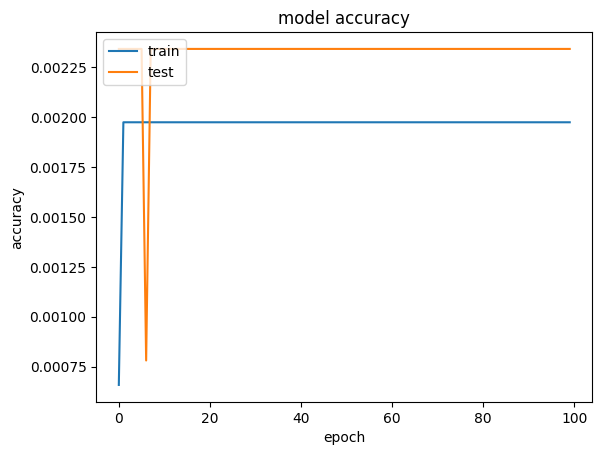

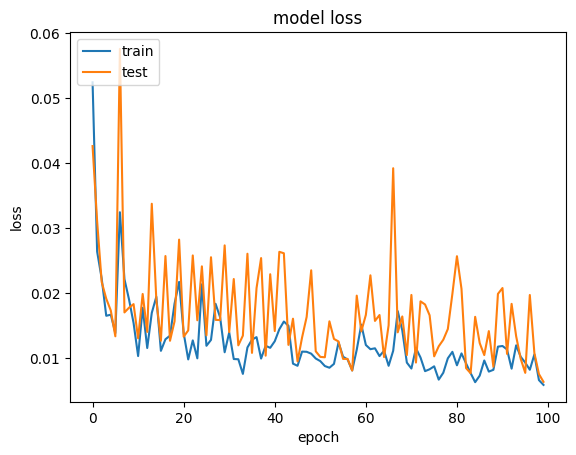

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### MSE

In [60]:
model_mse=Sequential()
model_mse.add(LSTM(100,activation='relu',input_shape=(12, 3),return_sequences=True))
model_mse.add(LSTM(100,activation='relu',return_sequences=True))
model_mse.add(LSTM(10,activation='relu'))
model_mse.add(Dense(1))

In [61]:
model_mse.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='mse', metrics= ["accuracy"])
model_mse.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 12, 100)           41600     
                                                                 
 lstm_4 (LSTM)               (None, 12, 100)           80400     
                                                                 
 lstm_5 (LSTM)               (None, 10)                4440      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 126,451
Trainable params: 126,451
Non-trainable params: 0
_________________________________________________________________


In [62]:
history_mse = model_mse.fit(train_generator, validation_data= test_generator, epochs=100, verbose=1)

Epoch 1/100
48/48 [==============================] - 8s 106ms/step - loss: 0.0092 - accuracy: 6.5811e-04 - val_loss: 0.0193 - val_accuracy: 0.0023
Epoch 2/100
48/48 [==============================] - 4s 89ms/step - loss: 0.0050 - accuracy: 0.0020 - val_loss: 0.0156 - val_accuracy: 7.8064e-04
Epoch 3/100
48/48 [==============================] - 5s 96ms/step - loss: 0.0049 - accuracy: 0.0020 - val_loss: 0.0012 - val_accuracy: 0.0023
Epoch 4/100
48/48 [==============================] - 4s 88ms/step - loss: 7.1894e-04 - accuracy: 0.0020 - val_loss: 0.0015 - val_accuracy: 0.0023
Epoch 5/100
48/48 [==============================] - 6s 137ms/step - loss: 0.0011 - accuracy: 0.0020 - val_loss: 0.0021 - val_accuracy: 0.0023
Epoch 6/100
48/48 [==============================] - 6s 137ms/step - loss: 0.0120 - accuracy: 6.5811e-04 - val_loss: 0.0315 - val_accuracy: 7.8064e-04
Epoch 7/100
48/48 [==============================] - 7s 139ms/step - loss: 0.0081 - accuracy: 6.5811e-04 - val_loss: 0.0113 -

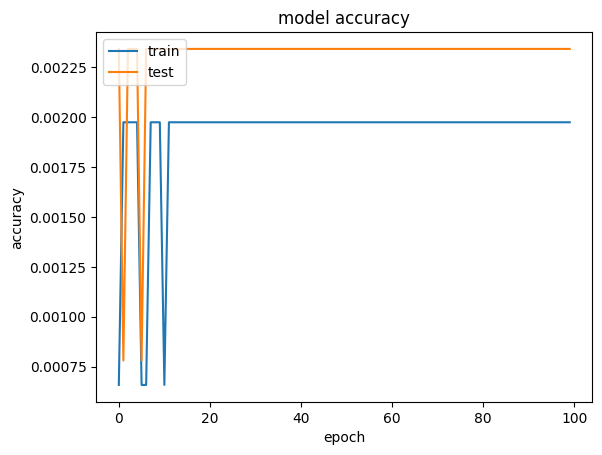

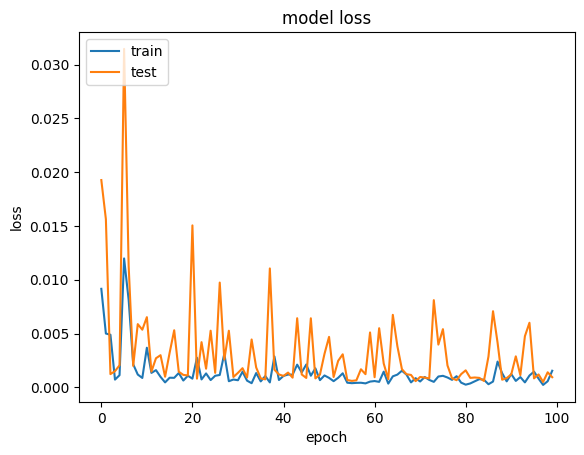

In [63]:
plt.plot(history_mse.history['accuracy'])
plt.plot(history_mse.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_mse.history['loss'])
plt.plot(history_mse.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Winter

## **Importing Data**

In [64]:
river_2018_w = pd.read_csv("RiverFlow2021Winter.csv")

In [65]:
river_2018_w

,Timestamp,BlairCreek,Bridgeport,BridgeportWQ,Doon,Drayton,Elmira,Erbsville,Keldon,Leggatt,MillCreek,Moorefield,Phillipsburg,Road32,VictoriaRoad,Waldemar,WillowBrook,York
0,2021-10-01 00:00:00,0.203250,42.64050,42.265125,42.481859,2.152816,0.5750,0.116236,1.006065,3.097492,0.571228,0.934857,2.119625,3.358105,1.164182,3.683873,0.348275,82.37500
1,2021-10-01 01:00:00,0.207750,40.45650,40.079625,42.380242,2.126455,0.5750,0.114638,0.992918,3.023445,0.571991,0.918827,2.095225,3.364754,1.163720,3.609610,0.347000,81.50000
2,2021-10-01 02:00:00,0.207500,38.20425,37.847625,41.583612,2.099489,0.5750,0.114102,0.977780,2.972076,0.572000,0.905488,2.076925,3.217815,1.162576,3.546715,0.344025,80.40625
3,2021-10-01 03:00:00,0.208500,35.65200,35.080875,40.378174,2.071719,0.5750,0.114140,0.965829,2.909349,0.572106,0.893279,2.064725,2.820136,1.163583,3.478113,0.342325,79.34375
4,2021-10-01 04:00:00,0.200750,32.70000,31.733100,38.699796,2.046926,0.5750,0.114140,0.964434,2.920678,0.572035,0.885706,2.051000,2.580462,1.160430,3.472332,0.339775,78.34375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,2022-03-31 19:00:00,0.331250,25.86125,7.772723,24.569019,7.594494,1.3052,0.343790,5.527500,7.226057,1.101059,6.236236,6.076562,11.123790,1.852869,11.579005,2.522000,80.12500
4364,2022-03-31 20:00:00,0.347375,25.94000,7.822959,24.776901,8.879200,1.3440,0.359796,6.912187,7.328698,1.153410,6.288714,6.411250,11.017154,1.869848,12.493277,2.799500,80.90625
4365,2022-03-31 21:00:00,0.363000,26.23750,7.987500,24.813090,10.686920,1.3860,0.372770,8.195833,7.455823,1.195813,6.289375,6.756875,10.794405,1.877686,13.455729,2.994500,81.00000
4366,2022-03-31 22:00:00,0.382333,26.45625,8.173980,24.858538,12.625962,1.4210,0.383293,9.268750,7.619673,1.227734,6.291106,7.330000,10.557437,1.889447,14.482761,3.172000,79.40625


In [66]:
river_2018_w.set_index(["Timestamp"], inplace= True)

In [67]:
river_2018_w[river_2018_w == np.nan].count()

BlairCreek      0
Bridgeport      0
BridgeportWQ    0
Doon            0
Drayton         0
Elmira          0
Erbsville       0
Keldon          0
Leggatt         0
MillCreek       0
Moorefield      0
Phillipsburg    0
Road32          0
VictoriaRoad    0
Waldemar        0
WillowBrook     0
York            0
dtype: int64

In [68]:
river_2018_w[river_2018_w <= 0].count()

BlairCreek      0
Bridgeport      0
BridgeportWQ    0
Doon            0
Drayton         0
Elmira          0
Erbsville       0
Keldon          0
Leggatt         0
MillCreek       0
Moorefield      0
Phillipsburg    0
Road32          0
VictoriaRoad    0
Waldemar        0
WillowBrook     0
York            0
dtype: int64

## **Preprocessing of DataFrame**

We need only York, Doon and Bridgeport Stations data

Extracting only the three stations we which we need

In [69]:
river_2018_w = river_2018_w[["York", "Doon", "Bridgeport"]]
river_2018_w

,York,Doon,Bridgeport
Timestamp,,,
2021-10-01 00:00:00,82.37500,42.481859,42.64050
2021-10-01 01:00:00,81.50000,42.380242,40.45650
2021-10-01 02:00:00,80.40625,41.583612,38.20425
2021-10-01 03:00:00,79.34375,40.378174,35.65200
2021-10-01 04:00:00,78.34375,38.699796,32.70000
...,...,...,...
2022-03-31 19:00:00,80.12500,24.569019,25.86125
2022-03-31 20:00:00,80.90625,24.776901,25.94000
2022-03-31 21:00:00,81.00000,24.813090,26.23750


In [70]:
len(river_2018_w)

4368

Here, I will divide the dataframe into training and testing by 70-30 split in chronological order. So training would contain - 3075 and testing would contain the rest.

In [71]:
train_2018_w = river_2018_w.iloc[0: 3075, :]
train_2018_w

,York,Doon,Bridgeport
Timestamp,,,
2021-10-01 00:00:00,82.375000,42.481859,42.64050
2021-10-01 01:00:00,81.500000,42.380242,40.45650
2021-10-01 02:00:00,80.406250,41.583612,38.20425
2021-10-01 03:00:00,79.343750,40.378174,35.65200
2021-10-01 04:00:00,78.343750,38.699796,32.70000
...,...,...,...
2022-02-05 22:00:00,63.605825,12.718508,23.27125
2022-02-05 23:00:00,62.813592,13.914757,23.70000
2022-02-06 00:00:00,61.322330,14.339141,24.12000


In [72]:
test_2018_w = river_2018_w.iloc[3075: , :]
test_2018_w

,York,Doon,Bridgeport
Timestamp,,,
2022-02-06 03:00:00,57.244660,15.291959,24.93375
2022-02-06 04:00:00,56.871845,15.253933,25.02125
2022-02-06 05:00:00,56.732039,14.609700,25.07375
2022-02-06 06:00:00,56.732039,14.479675,25.13500
2022-02-06 07:00:00,56.732039,14.402427,25.36250
...,...,...,...
2022-03-31 19:00:00,80.125000,24.569019,25.86125
2022-03-31 20:00:00,80.906250,24.776901,25.94000
2022-03-31 21:00:00,81.000000,24.813090,26.23750


Now, we need to use windowing.

In [73]:
train_df_w = pd.concat([train_2018_w["York"], train_2018_w["Doon"].shift(-18), train_2018_w["Bridgeport"].shift(-24)], axis= 1)
train_df_w

,York,Doon,Bridgeport
Timestamp,,,
2021-10-01 00:00:00,82.375000,18.164697,20.174937
2021-10-01 01:00:00,81.500000,18.102024,20.140625
2021-10-01 02:00:00,80.406250,18.021905,20.064375
2021-10-01 03:00:00,79.343750,17.913919,19.980500
2021-10-01 04:00:00,78.343750,17.844979,19.866125
...,...,...,...
2022-02-05 22:00:00,63.605825,NaN,NaN
2022-02-05 23:00:00,62.813592,NaN,NaN
2022-02-06 00:00:00,61.322330,NaN,NaN


In [74]:
test_df_w = pd.concat([test_2018_w["York"], test_2018_w["Doon"].shift(-18), test_2018_w["Bridgeport"].shift(-24)], axis= 1)
test_df_w

,York,Doon,Bridgeport
Timestamp,,,
2022-02-06 03:00:00,57.244660,12.007806,24.30375
2022-02-06 04:00:00,56.871845,12.651310,24.45250
2022-02-06 05:00:00,56.732039,12.804147,24.62750
2022-02-06 06:00:00,56.732039,12.883185,24.75000
2022-02-06 07:00:00,56.732039,13.314616,24.88125
...,...,...,...
2022-03-31 19:00:00,80.125000,NaN,NaN
2022-03-31 20:00:00,80.906250,NaN,NaN
2022-03-31 21:00:00,81.000000,NaN,NaN


In [75]:
train_df_w.head(25)

,York,Doon,Bridgeport
Timestamp,,,
2021-10-01 00:00:00,82.375000,18.164697,20.174937
2021-10-01 01:00:00,81.500000,18.102024,20.140625
2021-10-01 02:00:00,80.406250,18.021905,20.064375
2021-10-01 03:00:00,79.343750,17.913919,19.980500
2021-10-01 04:00:00,78.343750,17.844979,19.866125
2021-10-01 05:00:00,77.250000,17.750473,19.728875
2021-10-01 06:00:00,76.312500,17.659273,19.576375
2021-10-01 07:00:00,75.593750,17.594276,19.568750
2021-10-01 08:00:00,74.906796,17.516692,19.850875


Cross-checking values for Doon and Bridgeport

In [76]:
train_2018_w["Doon"][18:30]

Timestamp
2021-10-01 18:00:00    18.164697
2021-10-01 19:00:00    18.102024
2021-10-01 20:00:00    18.021905
2021-10-01 21:00:00    17.913919
2021-10-01 22:00:00    17.844979
2021-10-01 23:00:00    17.750473
2021-10-02 00:00:00    17.659273
2021-10-02 01:00:00    17.594276
2021-10-02 02:00:00    17.516692
2021-10-02 03:00:00    17.463402
2021-10-02 04:00:00    17.549254
2021-10-02 05:00:00    17.787361
Name: Doon, dtype: float64

In [77]:
train_2018_w["Bridgeport"][24: 36]

Timestamp
2021-10-02 00:00:00    20.174937
2021-10-02 01:00:00    20.140625
2021-10-02 02:00:00    20.064375
2021-10-02 03:00:00    19.980500
2021-10-02 04:00:00    19.866125
2021-10-02 05:00:00    19.728875
2021-10-02 06:00:00    19.576375
2021-10-02 07:00:00    19.568750
2021-10-02 08:00:00    19.850875
2021-10-02 09:00:00    19.820375
2021-10-02 10:00:00    19.568750
2021-10-02 11:00:00    19.362875
Name: Bridgeport, dtype: float64

In [78]:
train_df_w.tail(40)

,York,Doon,Bridgeport
Timestamp,,,
2022-02-04 11:00:00,61.951456,13.279959,25.091250
2022-02-04 12:00:00,61.928155,13.016675,25.380000
2022-02-04 13:00:00,61.159223,13.023830,25.625000
2022-02-04 14:00:00,60.646602,13.062067,25.846667
2022-02-04 15:00:00,60.856311,13.071465,26.348333
2022-02-04 16:00:00,62.277670,13.027859,26.447500
2022-02-04 17:00:00,63.932039,13.231662,26.132500
2022-02-04 18:00:00,65.423301,13.520780,25.493750
2022-02-04 19:00:00,66.518447,13.792678,24.198750


We can see that there are 18 missing in Doon and 24 missing in Bridgeport. Now we will drop na values, so total number of rows would decrease by 24.

In [79]:
train_df_w.shape, test_df_w.shape

((3075, 3), (1293, 3))

In [80]:
train_df_w.dropna(inplace= True)
train_df_w.shape

(3051, 3)

In [81]:
test_df_w.dropna(inplace= True)
test_df_w.shape

(1269, 3)

We can see that there is a decrease of 24 rows after dropping the na values. So far everything is correct.

## **Features and Target extraction with Scaling**

In [82]:
train_df_w.head()

,York,Doon,Bridgeport
Timestamp,,,
2021-10-01 00:00:00,82.37500,18.164697,20.174937
2021-10-01 01:00:00,81.50000,18.102024,20.140625
2021-10-01 02:00:00,80.40625,18.021905,20.064375
2021-10-01 03:00:00,79.34375,17.913919,19.980500
2021-10-01 04:00:00,78.34375,17.844979,19.866125


In [83]:
train_df_w.tail()

,York,Doon,Bridgeport
Timestamp,,,
2022-02-04 22:00:00,68.988350,14.668510,23.27125
2022-02-04 23:00:00,69.570874,14.608358,23.70000
2022-02-05 00:00:00,69.407767,12.855010,24.12000
2022-02-05 01:00:00,67.590291,11.065200,24.47000
2022-02-05 02:00:00,65.003884,10.779557,24.75000


### Features

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scalerFeature = MinMaxScaler()

In [86]:
features_w = scalerFeature.fit_transform(train_df_w)

In [87]:
features_w[0: 5]

array([[0.18059731, 0.05481039, 0.06404802],
       [0.17774168, 0.0544093 , 0.06382228],
       [0.17417214, 0.05389655, 0.06332064],
       [0.17070459, 0.05320545, 0.06276884],
       [0.16744101, 0.05276424, 0.06201639]])

In [88]:
features_test_w = scalerFeature.fit_transform(test_df_w)
features_test_w[0: 5]

array([[0.00426951, 0.00386623, 0.02104515],
       [0.00354288, 0.00650611, 0.02168566],
       [0.00327039, 0.0071331 , 0.02243919],
       [0.00327039, 0.00745734, 0.02296667],
       [0.00327039, 0.00922721, 0.02353182]])

We have converted the datafram to an array which is scaled. I will check if this is a list or not. I have to pass list to the model. So I will convert the numpy array to list.


In [89]:
np.shape(features_w), type(features_w)

((3051, 3), numpy.ndarray)

In [90]:
np.shape(features_test_w), type(features_test_w)

((1269, 3), numpy.ndarray)

In [91]:
features_w = features_w.tolist()
features_test_w = features_test_w.tolist()
features_w[0: 5], features_test_w[0: 5]

([[0.18059730718009215, 0.05481039285116957, 0.06404801794183898],
  [0.17774167696514676, 0.05440929761631335, 0.06382228102805063],
  [0.17417213919646501, 0.0538965499094013, 0.06332064344185429],
  [0.17070458822117413, 0.053205452435970975, 0.06276884209703834],
  [0.1674410108326651, 0.05276424447769907, 0.062016385717743844]],
 [[0.0042695109447797586, 0.003866230070497516, 0.02104515288684597],
  [0.0035428754470185064, 0.0065061050238616955, 0.021685657539923894],
  [0.0032703871231764825, 0.007133095590360253, 0.022439192425897925],
  [0.0032703871231764825, 0.007457339778063822, 0.02296666684607973],
  [0.0032703871231764825, 0.009227214994373595, 0.023531818010560257]])

In [92]:
type(features_w), type(features_test_w)

(list, list)

We can see that the number of rows are matching the train_df dataframe and the type has changed to List. We are done with features of training and testing data set.

### Target

Now, we will create the target list.

In [93]:
scalerTarget = MinMaxScaler()

In [94]:
target_w = scalerTarget.fit_transform(train_df_w.iloc[:, 0].values.reshape(-1, 1))

In [95]:
target_w

array([[0.18059731],
       [0.17774168],
       [0.17417214],
       ...,
       [0.13827774],
       [0.13234627],
       [0.12390532]])

In [96]:
target_test_w = scalerTarget.fit_transform(test_df_w.iloc[:, 0].values.reshape(-1, 1))
target_test_w

array([[0.00426951],
       [0.00354288],
       [0.00327039],
       ...,
       [0.04545357],
       [0.04429632],
       [0.04423541]])

In [97]:
target_w[: 5], target_w[-5:]

(array([[0.18059731],
        [0.17774168],
        [0.17417214],
        [0.17070459],
        [0.16744101]]),
 array([[0.13690894],
        [0.13881005],
        [0.13827774],
        [0.13234627],
        [0.12390532]]))

In [98]:
np.shape(target_w), type(target_w)

((3051, 1), numpy.ndarray)

In [99]:
np.shape(target_test_w), type(target_test_w)

((1269, 1), numpy.ndarray)

Again, I will convert the numpyt array to list

In [100]:
target_w = target_w.tolist()
target_test_w = target_test_w.tolist()
type(target_w), type(target_test_w)

(list, list)

## **TimeSeriesGenerator**

In [101]:
import tensorflow as tf

In [102]:
print(tf.__version__)

2.12.0


In [103]:
print(tf.config.list_physical_devices('GPU'))

[]


In [104]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [105]:
train_generator_w = TimeseriesGenerator(features_w, target_w, length= 12, sampling_rate= 1, batch_size= 64)
test_generator_w = TimeseriesGenerator(features_test_w, target_test_w, length= 12, sampling_rate= 1, batch_size= 1)

In [106]:
train_generator_w[0][0][0]

array([[0.18059731, 0.05481039, 0.06404802],
       [0.17774168, 0.0544093 , 0.06382228],
       [0.17417214, 0.05389655, 0.06332064],
       [0.17070459, 0.05320545, 0.06276884],
       [0.16744101, 0.05276424, 0.06201639],
       [0.16387147, 0.05215942, 0.06111344],
       [0.16081187, 0.05157575, 0.06011016],
       [0.15846617, 0.05115978, 0.06006   ],
       [0.15622425, 0.05066325, 0.06191606],
       [0.15470336, 0.0503222 , 0.0617154 ],
       [0.15325851, 0.05087165, 0.06006   ],
       [0.1520418 , 0.0523955 , 0.05870558]])

In [107]:
train_generator_w.get_config()

{'data': '[[0.18059730718009215, 0.05481039285116957, 0.06404801794183898], [0.17774167696514676, 0.05440929761631335, 0.06382228102805063], [0.17417213919646501, 0.0538965499094013, 0.06332064344185429], [0.17070458822117413, 0.053205452435970975, 0.06276884209703834], [0.1674410108326651, 0.05276424447769907, 0.062016385717743844], [0.1638714730639833, 0.05215941827098069, 0.06111343806259045], [0.1608118692622561, 0.051575749937898784, 0.0601101628901978], [0.15846617301426522, 0.05115978302803364, 0.06005999913157817], [0.15622424586454867, 0.05066325199073831, 0.06191605820050458], [0.15470335542283056, 0.05032220401966781, 0.06171540316602603], [0.1532585094999348, 0.050871645324713784, 0.06005999913157817], [0.1520417971661418, 0.0523954963119616, 0.05870557764884807], [0.15052090672442367, 0.052217231407588834, 0.05815377630403212], [0.14945628342827533, 0.04941784138272621, 0.05840459509713028], [0.14831561561330464, 0.04754312126302999, 0.058655413890228464], [0.1469468142092

The configuration shows a dictionary. I will try to get more information about the dictionary.

In [108]:
diction_w = train_generator_w.get_config()
diction_w.keys()

dict_keys(['data', 'targets', 'length', 'sampling_rate', 'stride', 'start_index', 'end_index', 'shuffle', 'reverse', 'batch_size'])

In [109]:
diction_w["targets"]

'[[0.18059730718009215], [0.17774167696514676], [0.17417213919646501], [0.17070458822117413], [0.1674410108326651], [0.1638714730639833], [0.1608118692622561], [0.15846617301426522], [0.15622424586454867], [0.15470335542283056], [0.1532585094999348], [0.1520417971661418], [0.15052090672442367], [0.14945628342827533], [0.14831561561330464], [0.1469468142092312], [0.1458061463942605], [0.14496965665457914], [0.1445133895090094], [0.1432966771752164], [0.1420799648087876], [0.13987467369766854], [0.13599640307455096], [0.13120559822556546], [0.1271752385648032], [0.12367719056843307], [0.11995100901559591], [0.11546438224189973], [0.11059753284145613], [0.1054265053657232], [0.10055965599791539], [0.0960730292242192], [0.0916768611136898], [0.08607795334959861], [0.08279163793207256], [0.0794444648246512], [0.07567128785532684], [0.07281097626706806], [0.07031581085081692], [0.0685509377459454], [0.06702949543329087], [0.06556891077789592], [0.0630175690450629], [0.06022079020317744], [0.

I will store the dictionary in a dataframe

In [110]:
train_generator_df_w = pd.DataFrame(list(diction_w.items()), columns= ["Keys", "Values"])
train_generator_df_w

,Keys,Values
0,data,"[[0.18059730718009215, 0.05481039285116957, 0...."
1,targets,"[[0.18059730718009215], [0.17774167696514676],..."
2,length,12
3,sampling_rate,1
4,stride,1
5,start_index,12
6,end_index,3050
7,shuffle,False
8,reverse,False
9,batch_size,64


We pass different types of parameters to the model, like feautures, target variable and now we also want our model to use the windowing. So the parameters of windowing like the sampling rate, the length of a window, the stride and all we have to pass to the model. This is done by the object of TimeseriesGenerator. When we see the configuration of it, we see a dictionary. The parameters which we want to pass to the model are the "keys" of the dictionary and the parameter values which we actually pass to the model is the "value" of that particular parameter (i.e. "key"). We can see that above.

We will do the same with the test data set

In [111]:
test_generator_w[0][0][0]

array([[0.00426951, 0.00386623, 0.02104515],
       [0.00354288, 0.00650611, 0.02168566],
       [0.00327039, 0.0071331 , 0.02243919],
       [0.00327039, 0.00745734, 0.02296667],
       [0.00327039, 0.00922721, 0.02353182],
       [0.00327039, 0.01124709, 0.02451141],
       [0.00327039, 0.01276656, 0.02579242],
       [0.00327039, 0.01408469, 0.02718646],
       [0.00327039, 0.0153285 , 0.02831676],
       [0.00327039, 0.01612149, 0.02952242],
       [0.00327039, 0.01681173, 0.03095414],
       [0.00327039, 0.01767185, 0.0318207 ]])

In [112]:
test_generator_w.get_config()

{'data': '[[0.0042695109447797586, 0.003866230070497516, 0.02104515288684597], [0.0035428754470185064, 0.0065061050238616955, 0.021685657539923894], [0.0032703871231764825, 0.007133095590360253, 0.022439192425897925], [0.0032703871231764825, 0.007457339778063822, 0.02296666684607973], [0.0032703871231764825, 0.009227214994373595, 0.023531818010560257], [0.0032703871231764825, 0.011247089983290347, 0.024511413362326484], [0.0032703871231764825, 0.012766555930853504, 0.02579242266848232], [0.0032703871231764825, 0.014084690529194928, 0.027186462207534276], [0.0032703871231764825, 0.015328502275591543, 0.0283167645364953], [0.0032703871231764825, 0.016121488350163096, 0.029522420354053752], [0.0032703871231764825, 0.016811726091811932, 0.030954136637404386], [0.0032703871231764825, 0.01767185369822937, 0.03182070175627451], [0.0032703871231764825, 0.018575098598034988, 0.032009085477768026], [0.0042695109447797586, 0.0195414361786549, 0.02801535058210569], [0.007584785450823556, 0.0203350

In [113]:
diction_test_w = test_generator_w.get_config()
diction_test_w.keys()

dict_keys(['data', 'targets', 'length', 'sampling_rate', 'stride', 'start_index', 'end_index', 'shuffle', 'reverse', 'batch_size'])

In [114]:
diction_test["targets"]

'[[0.005566871101423378], [0.005271047024173074], [0.005136581551087198], [0.005002116051957481], [0.004921436762897191], [0.004733185079741881], [0.0047062919747071705], [0.0047062919747071705], [0.0047062919747071705], [0.0047062919747071705], [0.0047062919747071705], [0.0047062919747071705], [0.0047062919747071705], [0.0047062919747071705], [0.004518040317595708], [0.0044911472125609975], [0.0044911472125609975], [0.004598719606656004], [0.006968850697215499], [0.010312795031358062], [0.009835088683026932], [0.009070758556949735], [0.008720440580327359], [0.0082745813444563], [0.007860569195001464], [0.007510251218379095], [0.007032544896091807], [0.0066822269194694375], [0.006427450202095751], [0.006292984729009875], [0.006077839940819861], [0.005970267546724861], [0.005782015863569551], [0.005782015863569551], [0.005782015863569551], [0.005782015863569551], [0.005782015863569551], [0.005916481362699275], [0.006185412334914868], [0.006212305413905744], [0.006212305413905744], [0.00

I will store the dictionary in a dataframe

In [115]:
test_generator_df_w = pd.DataFrame(list(diction_test_w.items()), columns= ["Keys", "Values"])
test_generator_df_w

,Keys,Values
0,data,"[[0.0042695109447797586, 0.003866230070497516,..."
1,targets,"[[0.0042695109447797586], [0.00354287544701850..."
2,length,12
3,sampling_rate,1
4,stride,1
5,start_index,12
6,end_index,1268
7,shuffle,False
8,reverse,False
9,batch_size,1


We can see that it is same as the train generator object.

## **Building Model**

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

### MAE

In [117]:
model_mae_w=Sequential()
model_mae_w.add(LSTM(100,activation='relu',input_shape=(12, 3),return_sequences=True))
model_mae_w.add(LSTM(100,activation='relu',return_sequences=True))
model_mae_w.add(LSTM(10,activation='relu'))
model_mae_w.add(Dense(1))

In [118]:
model_mae_w.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='mae', metrics= ["accuracy"])
model_mae_w.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 12, 100)           41600     
                                                                 
 lstm_7 (LSTM)               (None, 12, 100)           80400     
                                                                 
 lstm_8 (LSTM)               (None, 10)                4440      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 126,451
Trainable params: 126,451
Non-trainable params: 0
_________________________________________________________________


In [119]:
history = model_mae_w.fit(train_generator_w, validation_data= test_generator_w, epochs=100, verbose=1)

Epoch 1/100
48/48 [==============================] - 8s 110ms/step - loss: 0.0805 - accuracy: 6.5811e-04 - val_loss: 0.2096 - val_accuracy: 0.0024
Epoch 2/100
48/48 [==============================] - 5s 98ms/step - loss: 0.0693 - accuracy: 6.5811e-04 - val_loss: 0.1637 - val_accuracy: 0.0016
Epoch 3/100
48/48 [==============================] - 6s 137ms/step - loss: 0.0466 - accuracy: 6.5811e-04 - val_loss: 0.0739 - val_accuracy: 0.0024
Epoch 4/100
48/48 [==============================] - 5s 96ms/step - loss: 0.0260 - accuracy: 6.5811e-04 - val_loss: 0.0610 - val_accuracy: 0.0024
Epoch 5/100
48/48 [==============================] - 4s 88ms/step - loss: 0.0251 - accuracy: 6.5811e-04 - val_loss: 0.0510 - val_accuracy: 0.0024
Epoch 6/100
48/48 [==============================] - 7s 145ms/step - loss: 0.0251 - accuracy: 6.5811e-04 - val_loss: 0.0456 - val_accuracy: 0.0024
Epoch 7/100
48/48 [==============================] - 4s 86ms/step - loss: 0.0269 - accuracy: 6.5811e-04 - val_loss: 0.048

In [120]:
import matplotlib.pyplot as plt

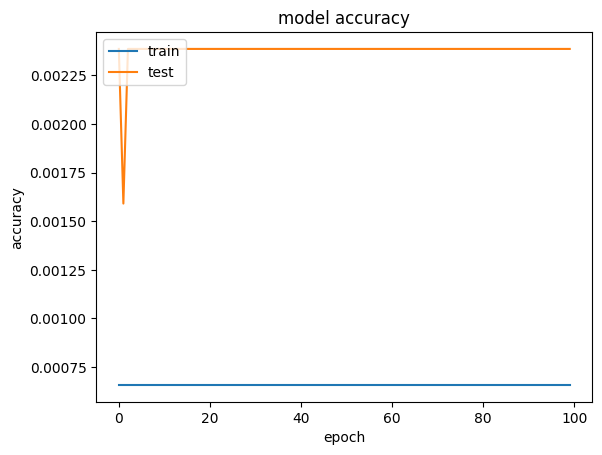

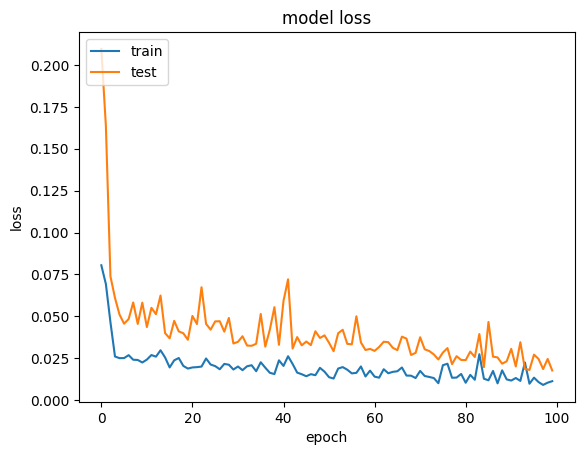

In [121]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### MSE

In [122]:
model_mse_w=Sequential()
model_mse_w.add(LSTM(100,activation='relu',input_shape=(12, 3),return_sequences=True))
model_mse_w.add(LSTM(100,activation='relu',return_sequences=True))
model_mse_w.add(LSTM(10,activation='relu'))
model_mse_w.add(Dense(1))

In [123]:
model_mse_w.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='mse', metrics= ["accuracy"])
model_mse_w.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 12, 100)           41600     
                                                                 
 lstm_10 (LSTM)              (None, 12, 100)           80400     
                                                                 
 lstm_11 (LSTM)              (None, 10)                4440      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 126,451
Trainable params: 126,451
Non-trainable params: 0
_________________________________________________________________


In [124]:
history_mse = model_mse_w.fit(train_generator_w, validation_data= test_generator_w, epochs=100, verbose=1)

Epoch 1/100
48/48 [==============================] - 7s 98ms/step - loss: 0.0128 - accuracy: 6.5811e-04 - val_loss: 0.0251 - val_accuracy: 0.0016
Epoch 2/100
48/48 [==============================] - 5s 101ms/step - loss: 0.0040 - accuracy: 6.5811e-04 - val_loss: 0.0480 - val_accuracy: 0.0024
Epoch 3/100
48/48 [==============================] - 6s 137ms/step - loss: 0.0162 - accuracy: 6.5811e-04 - val_loss: 0.0305 - val_accuracy: 0.0016
Epoch 4/100
48/48 [==============================] - 5s 99ms/step - loss: 0.0085 - accuracy: 6.5811e-04 - val_loss: 0.0172 - val_accuracy: 0.0024
Epoch 5/100
48/48 [==============================] - 6s 137ms/step - loss: 0.0046 - accuracy: 6.5811e-04 - val_loss: 0.0175 - val_accuracy: 0.0024
Epoch 6/100
48/48 [==============================] - 6s 137ms/step - loss: 0.0030 - accuracy: 6.5811e-04 - val_loss: 0.0063 - val_accuracy: 0.0024
Epoch 7/100
48/48 [==============================] - 4s 88ms/step - loss: 0.0018 - accuracy: 6.5811e-04 - val_loss: 0.00

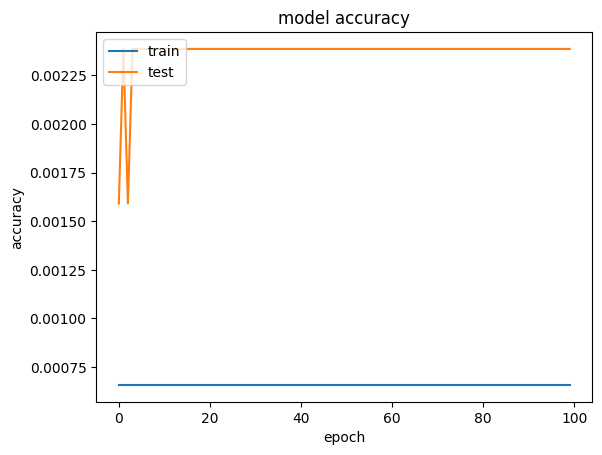

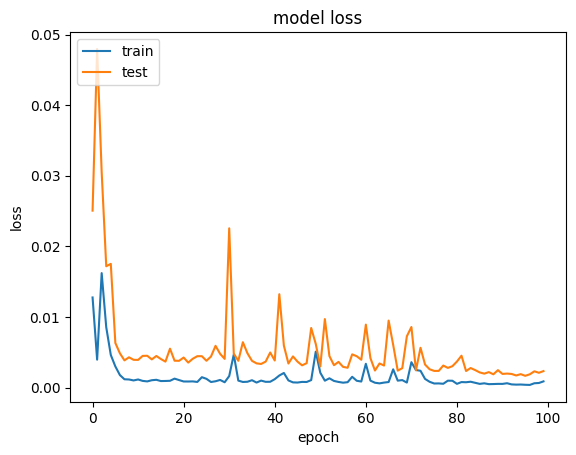

In [125]:
plt.plot(history_mse.history['accuracy'])
plt.plot(history_mse.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_mse.history['loss'])
plt.plot(history_mse.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Hydrograph of Predicted and Actual


### For Summer

MAE

In [126]:
predict = model_mae.predict(test_generator)

1281/1281 [==============================] - 4s 3ms/step


In [127]:
orig_predict = scalerTarget.inverse_transform(predict)

In [134]:
orig_target_test = scalerTarget.inverse_transform(target_test)

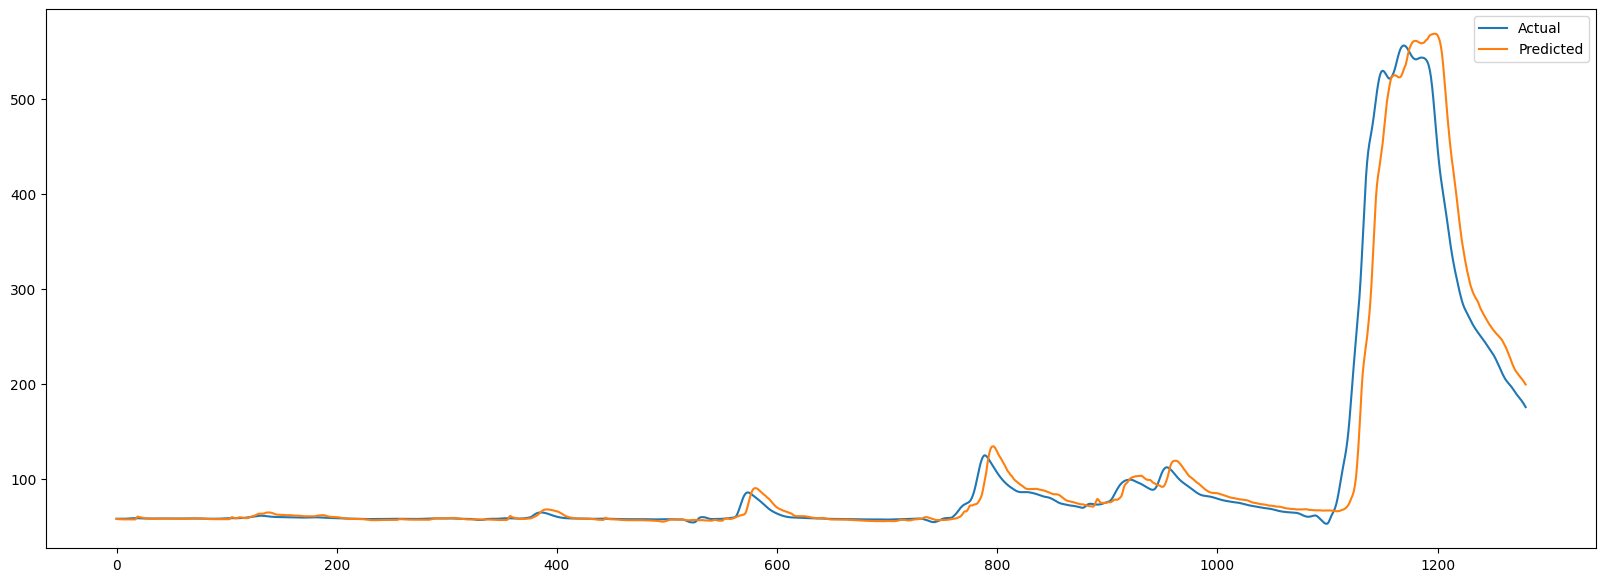

In [151]:
plt.figure(figsize= (20, 7))
plt.plot(orig_predict, label= "Actual")
plt.plot(orig_target_test[0: 1281], label= "Predicted")
plt.legend()

MSE

In [139]:
predict_s_mse = model_mse.predict(test_generator)

1281/1281 [==============================] - 4s 3ms/step


In [140]:
orig_predict_s_mse = scalerTarget.inverse_transform(predict_s_mse)

In [141]:
orig_target_test_mse = scalerTarget.inverse_transform(target_test)

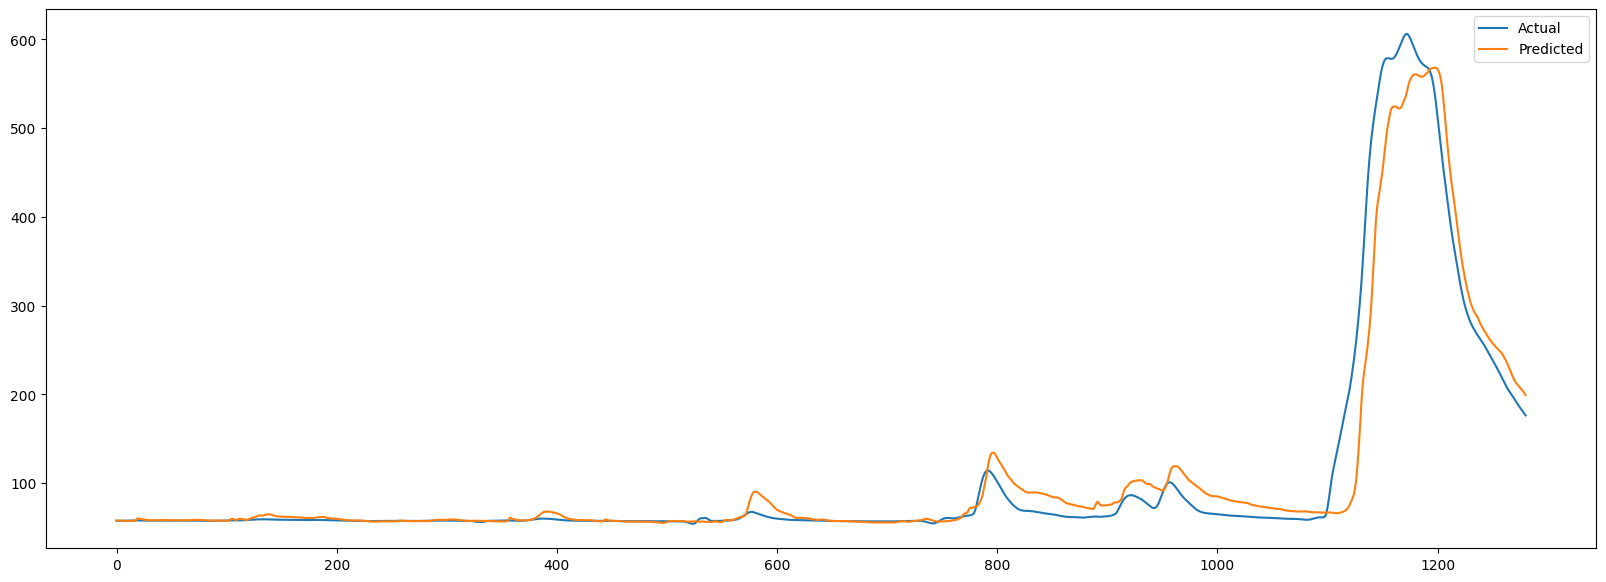

In [152]:
plt.figure(figsize= (20, 7))
plt.plot(orig_predict_s_mse, label= "Actual")
plt.plot(orig_target_test_mse[0: 1281], label= "Predicted")
plt.legend()

### For Winter

MAE

In [143]:
predict_w = model_mae_w.predict(test_generator_w)

1257/1257 [==============================] - 5s 3ms/step


In [144]:
orig_predict_w_mae = scalerTarget.inverse_transform(predict_w)

In [145]:
orig_target_test_w = scalerTarget.inverse_transform(target_test_w)

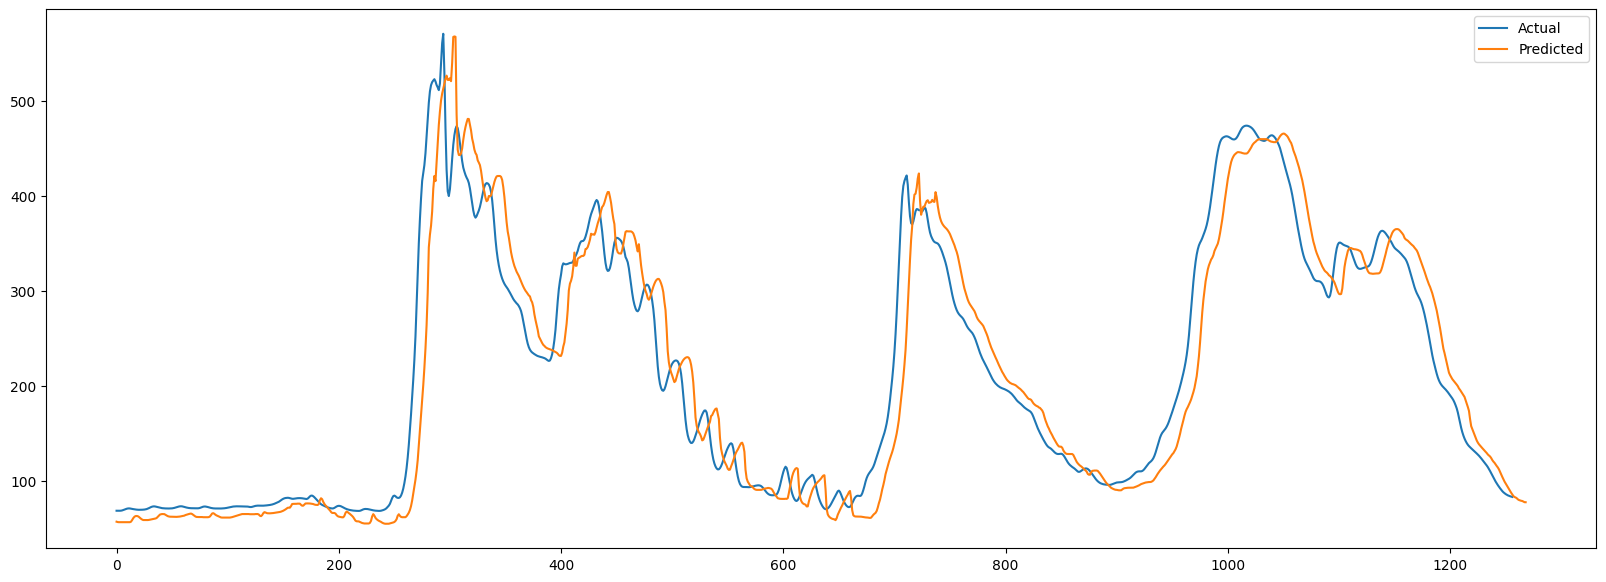

In [153]:
plt.figure(figsize= (20, 7))
plt.plot(orig_predict_w_mae, label= "Actual")
plt.plot(orig_target_test_w[0: 1281], label= "Predicted")
plt.legend()

MSE

In [147]:
predict_w_mse = model_mse_w.predict(test_generator_w)

1257/1257 [==============================] - 4s 3ms/step


In [148]:
orig_predict_w_mse = scalerTarget.inverse_transform(predict_w_mse)

In [149]:
orig_target_test_w_mse = scalerTarget.inverse_transform(target_test_w)

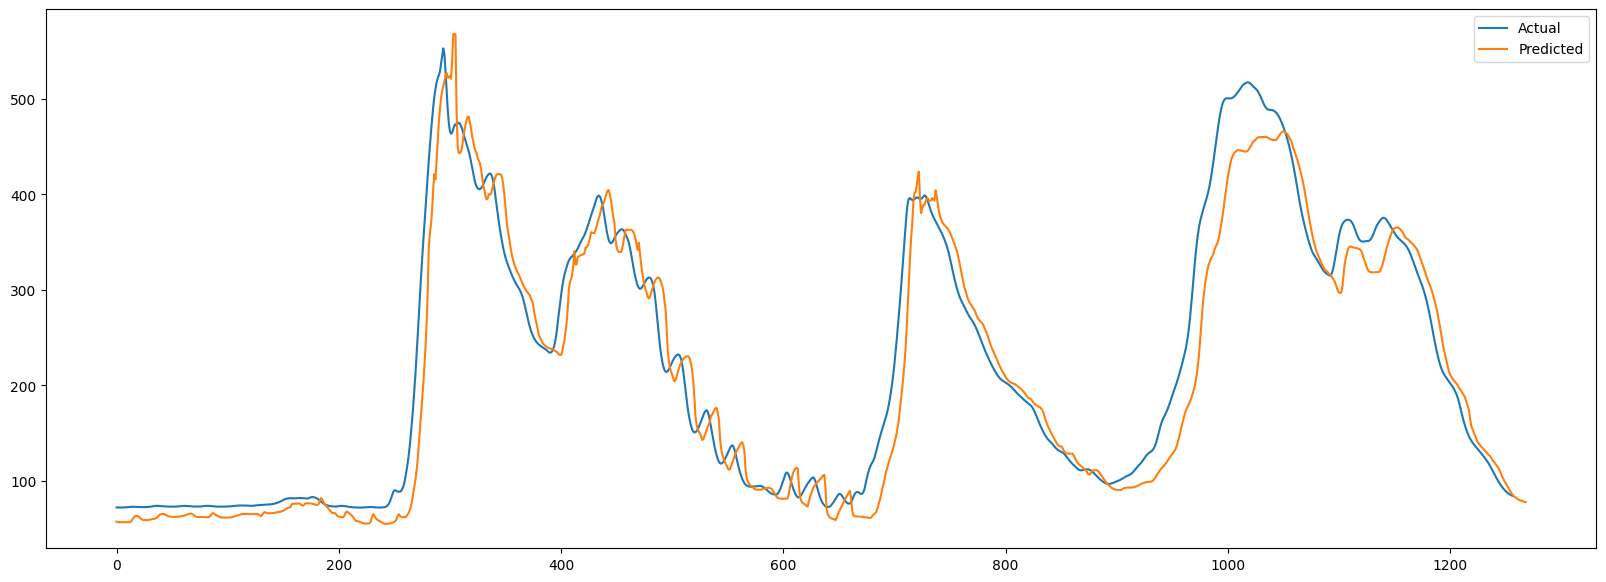

In [154]:
plt.figure(figsize= (20, 7))
plt.plot(orig_predict_w_mse, label= "Actual")
plt.plot(orig_target_test_w_mse[0: 1281], label= "Predicted")
plt.legend()